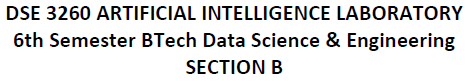

## Kartabya Krishna
## RegNo: 210968244
## Week: 08
## Date: 20240321

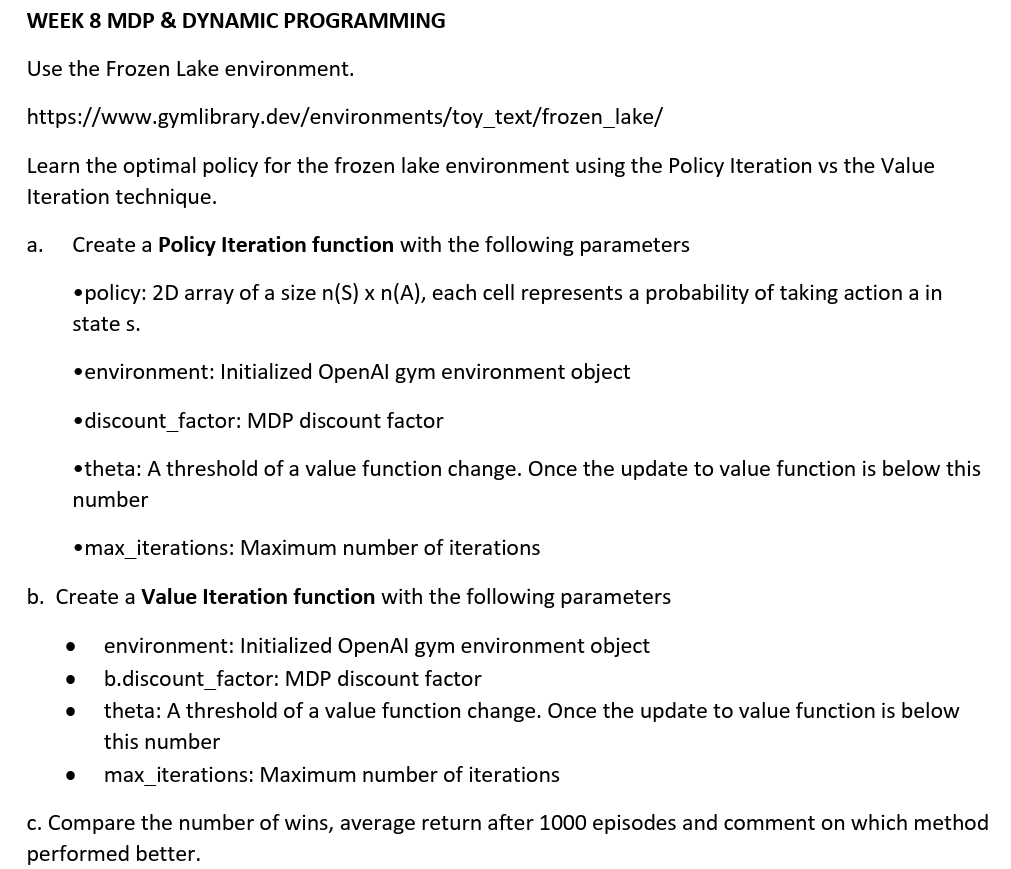

# Frozen Lake Environment

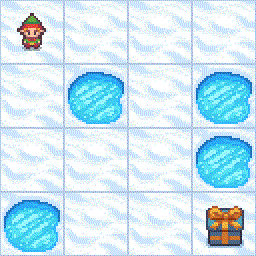

The Frozen Lake environment is part of the Toy Text environments in OpenAI Gym. This environment simulates the task of crossing a frozen lake from the starting point (S) to the goal (G) without falling into any holes (H) by walking over the frozen (F) lake. However, due to the slippery nature of the frozen lake, the agent may not always move in the intended direction.

## Action Space

The action space in the Frozen Lake environment is discrete and consists of four possible actions:

- **0: LEFT**
- **1: DOWN**
- **2: RIGHT**
- **3: UP**

The agent takes a 1-element vector to represent its action, where each element corresponds to one of the four possible directions.

## Observation Space

The observation space in the Frozen Lake environment is discrete and represents the agent's current position on the grid. The observation is calculated as `current_row * nrows + current_col`, where both the row and column indices start at 0. For example, in a 4x4 grid, the goal position would be calculated as `3 * 4 + 3 = 15`. The number of possible observations depends on the size of the grid, with a 4x4 grid having 16 possible observations.

## Rewards

The reward schedule in the Frozen Lake environment is as follows:

- **Reach Goal (G):** +1
- **Reach Hole (H):** 0
- **Reach Frozen (F):** 0

The agent receives a reward of +1 when it successfully reaches the goal, while reaching a hole or a frozen cell results in a reward of 0.


In [ ]:
import sys
import gym
import numpy as np

# Slippery Nature of the Frozen Lake

In the Frozen Lake environment, the parameter `is_slippery` determines whether the agent moves in the intended direction with certainty or if there's a chance of slipping.

- When `is_slippery` is **True**, the agent may not always move in the intended direction due to the slippery nature of the frozen lake. In this case, there is a probability of 1/3 that the agent will move in the intended direction, while there is an equal probability of 1/3 for the agent to move in either of the perpendicular directions.

- When `is_slippery` is **False**, the agent moves in the intended direction with certainty, without any possibility of slipping.

This parameter allows for different levels of stochasticity in the agent's movement, affecting the difficulty and realism of the environment.


In [ ]:
env = gym.make('FrozenLake-v1',is_slippery=True)

# State Value Calculation Function

The following Python function, `calculate_state_value`, is used to calculate the state values for a given state in the Frozen Lake environment. This function takes the environment, the current state, a matrix of state values, and a discount factor as inputs.

## Explanation:

- **Parameters**:
  - `env`: The Frozen Lake environment.
  - `current_state`: The current state for which the value is being calculated.
  - `value_matrix`: A matrix containing the estimated values for each state in the environment.
  - `discount_factor`: The discount factor used to discount future rewards.

- **Variables**:
  - `num_actions`: The number of possible actions in the environment.
  - `action_values`: An array to store the expected values for each action from the current state.

- **Functionality**:
  - The function iterates over each possible action available in the environment.
  - For each action, it considers the possible transitions from the current state, along with the associated probabilities, rewards, and next states.
  - It calculates the expected value for each action using the Bellman equation: the sum of the immediate reward and the discounted value of the next state.
  - The function returns an array containing the expected values for each action from the current state.

In [1]:
def calculate_state_value(env, current_state, value_matrix, discount_factor):

    num_actions = env.action_space.n
    action_values = np.zeros(shape=num_actions)
    for action in range(num_actions):
        for transition_prob, next_state, reward, done in env.env.P[current_state][action]:
            action_values[action] += transition_prob * (reward + discount_factor * value_matrix[next_state])
    return action_values

# Policy Evaluation Function

The following Python function, `evaluate_policy`, is used to evaluate a given policy in the Frozen Lake environment. This function takes the policy matrix, the environment, and optional parameters such as discount factor, convergence threshold, and maximum number of iterations as inputs.


## Explanation:

- **Parameters**:
  - `policy_matrix`: The policy matrix specifying the probability of taking each action in each state.
  - `environment`: The Frozen Lake environment.
  - `discount_factor`: (Optional) The discount factor used to discount future rewards. Default is 1.0.
  - `convergence_threshold`: (Optional) The threshold for convergence, indicating when to stop the evaluation process. Default is 1e-9.
  - `max_iterations`: (Optional) The maximum number of iterations allowed for the evaluation. Default is 1000.

- **Variables**:
  - `num_states`: The number of states in the environment.
  - `evaluation_iterations`: Counter for the number of iterations performed during policy evaluation.
  - `state_values`: An array to store the estimated values for each state.

- **Functionality**:
  - The function iterates through the policy evaluation process until either convergence or the maximum number of iterations is reached.
  - Within each iteration, it updates the state values using the Bellman equation for state values, considering the current policy.
  - Convergence is determined by comparing the maximum change in state values (`delta`) against the convergence threshold.
  - If the convergence threshold is met, the function terminates and returns the estimated state values.
  - Additionally, the function prints the number of iterations taken for policy evaluation.

In [ ]:
def evaluate_policy(policy_matrix, environment, discount_factor=1.0, convergence_threshold=1e-9, max_iterations=1000):
    num_states = environment.observation_space.n
    evaluation_iterations = 1
    state_values = np.zeros(shape=num_states)

    for iteration in range(int(max_iterations)):
        delta = 0
        for current_state in range(num_states):
            new_state_value = 0
            for action, action_probability in enumerate(policy_matrix[current_state]):
                for state_probability, next_state, reward, done in environment.P[current_state][action]:
                    new_state_value += action_probability * state_probability * (reward + discount_factor * state_values[next_state])
            delta = max(delta, np.abs(state_values[current_state] - new_state_value))
            state_values[current_state] = new_state_value

        evaluation_iterations += 1

        if delta < convergence_threshold:
            print(f'Policy evaluation terminated after {evaluation_iterations} iterations.\n')
            return state_values


# Policy Iteration Algorithm

The policy iteration algorithm is an iterative method used to find an optimal policy for a given Markov Decision Process (MDP). It alternates between two main steps: policy evaluation and policy improvement. Below is the Python implementation of the policy iteration algorithm for the Frozen Lake environment.

## Explanation:

- **Inputs**:
  - `environment`: The Frozen Lake environment.
  - `discount_factor`: (Optional) The discount factor used to discount future rewards. Default is 1.0.
  - `max_iterations`: (Optional) The maximum number of iterations allowed for the policy iteration process. Default is 1000.

- **Variables**:
  - `num_states`: The number of states in the environment.
  - `num_actions`: The number of possible actions in the environment.
  - `policy_matrix`: A matrix representing the current policy, initialized to a uniform distribution over actions for each state.
  - `evaluated_policies_count`: Counter for the number of policy evaluations performed.

- **Functionality**:
  1. **Policy Evaluation**:
     - The algorithm starts with an initial policy and evaluates its performance using the `evaluate_policy` function. This step iteratively updates the state values according to the current policy until convergence.
  
  2. **Policy Improvement**:
     - For each state, the algorithm selects the action that maximizes the expected value (using the `calculate_state_value` function) based on the current value function.
     - If the best action differs from the one prescribed by the current policy, the policy is updated to choose the best action for that state.
     - The process continues until no policy changes occur in an iteration, indicating that an optimal policy has been found.

- **Termination**:
  - The algorithm terminates when a stable policy is found, meaning that no further policy changes occur after an iteration.

This algorithm efficiently converges to an optimal policy by iteratively improving both the policy and the value function until convergence.

In [ ]:
def policy_iteration_algorithm(environment, discount_factor=1.0, max_iterations=1000):
    num_states = environment.observation_space.n
    num_actions = environment.action_space.n
    policy_matrix = np.ones(shape=[num_states, num_actions]) / num_actions
    evaluated_policies_count = 1

    for iteration in range(int(max_iterations)):
        stable_policy = False
        value_function = evaluate_policy(policy_matrix, environment, discount_factor)

        for current_state in range(num_states):
            current_action = np.argmax(policy_matrix[current_state])
            action_values = calculate_state_value(environment, current_state, value_function, discount_factor)
            best_action = np.argmax(action_values)

            if current_action != best_action:
                stable_policy = True

            policy_matrix[current_state] = np.eye(num_actions)[best_action]

        evaluated_policies_count += 1

        if stable_policy:
            print(f'Found a stable policy after {evaluated_policies_count:,} evaluations.\n')
            return policy_matrix, value_function


# Value Iteration Algorithm

The value iteration algorithm is an iterative method used to find the optimal value function for a given Markov Decision Process (MDP). It directly computes the optimal value function rather than iteratively improving a policy. Below is the Python implementation of the value iteration algorithm for the Frozen Lake environment.

## Explanation:

- **Inputs**:
  - `environment`: The Frozen Lake environment.
  - `discount_factor`: (Optional) The discount factor used to discount future rewards. Default is 1e-1.
  - `convergence_threshold`: (Optional) The threshold for convergence, indicating when to stop the value iteration process. Default is 1e-9.
  - `max_iterations`: (Optional) The maximum number of iterations allowed for the value iteration process. Default is 1e4.

- **Variables**:
  - `state_values`: An array containing the estimated values for each state.
  - `delta`: A variable used to track the maximum change in state values during an iteration.

- **Functionality**:
  1. **Initialization**:
     - The algorithm initializes the state values to zeros.
  
  2. **Iteration**:
     - The algorithm iteratively updates the state values until convergence or the maximum number of iterations is reached.
     - Within each iteration, for each state, it computes the action values using the `calculate_state_value` function and selects the best action value.
     - The state values are updated based on the best action value, and the maximum change in state values (`delta`) is tracked.

  3. **Convergence**:
     - The algorithm terminates when the maximum change in state values (`delta`) falls below the convergence threshold.

  4. **Policy Extraction**:
     - Once the optimal state values are obtained, the algorithm extracts the optimal policy by selecting the action with the highest value for each state.
     - The resulting policy matrix indicates the probability of selecting each action in each state.

- **Termination**:
  - The algorithm terminates when convergence is achieved or the maximum number of iterations is reached.

Value iteration is a computationally efficient method for finding the optimal policy in a finite MDP by directly computing the optimal value function.

In [ ]:
def value_iteration_algorithm(environment, discount_factor=1e-1, convergence_threshold=1e-9, max_iterations=1e4):
    state_values = np.zeros(environment.observation_space.n)

    for iteration in range(int(max_iterations)):
        delta = 0

        for current_state in range(environment.observation_space.n):
            action_values = calculate_state_value(environment, current_state, state_values, discount_factor)
            best_action_value = np.max(action_values)
            delta = max(delta, np.abs(state_values[current_state] - best_action_value))
            state_values[current_state] = best_action_value

        if delta < convergence_threshold:
            print(f'\nValue iteration converged at iteration #{iteration+1:,}')
            break

    policy_matrix = np.zeros(shape=[environment.observation_space.n, environment.action_space.n])

    for current_state in range(environment.observation_space.n):
        action_values = calculate_state_value(environment, current_state, state_values, discount_factor)
        best_action = np.argmax(action_values)
        policy_matrix[current_state, best_action] = 1.0

    return policy_matrix, state_values


# Playing Episodes and Evaluating Policies

The following Python function, `play_episodes_and_evaluate`, is used to play episodes using a given policy matrix in the Frozen Lake environment and evaluate its performance.

## Explanation:

- **Inputs**:
  - `env`: The Frozen Lake environment.
  - `num_episodes`: The number of episodes to play and evaluate.
  - `policy_matrix`: The policy matrix specifying the probability of taking each action in each state.
  - `max_actions`: (Optional) The maximum number of actions allowed per episode. Default is 100.
  - `render`: (Optional) A boolean flag indicating whether to render the environment during gameplay. Default is False.

- **Variables**:
  - `total_wins`: Counter for the total number of episodes successfully completed.
  - `total_rewards`: Total cumulative rewards obtained across all episodes.
  - `total_actions`: Total number of actions taken across all episodes.

- **Functionality**:
  - The function iterates through the specified number of episodes, playing each episode according to the provided policy.
  - Within each episode, it selects actions based on the policy matrix and updates the current state accordingly.
  - The episode terminates either when the goal is reached or when the maximum number of actions is exceeded.
  - If rendering is enabled, the environment is displayed during gameplay.
  - After all episodes are completed, the function calculates and prints the total rewards obtained and the maximum actions taken in any single episode.
  - It also computes and returns the total wins, total rewards, average reward per episode, and average actions per episode.

This function is useful for evaluating the performance of a given policy matrix in the Frozen Lake environment by simulating gameplay over multiple episodes.

In [ ]:
def play_episodes_and_evaluate(env, num_episodes, policy_matrix, max_actions=100, render=False):

    total_wins = 0
    total_rewards, total_actions = 0, 0

    for episode in range(num_episodes):
        current_state = env.reset()
        episode_done, actions_taken = False, 0

        while actions_taken < max_actions:
            selected_action = np.argmax(policy_matrix[current_state])
            next_state, reward, episode_done, _ = env.step(selected_action)

            if render:
                env.render()

            actions_taken += 1
            total_rewards += reward
            current_state = next_state

            if episode_done:
                total_wins += 1
                break

        total_actions += actions_taken

    print(f'Total rewards: {total_rewards:,}\tMax actions: {actions_taken:,}')

    average_reward = total_rewards / num_episodes
    average_actions = total_actions / num_episodes

    print('')
    return total_wins, total_rewards, average_reward, average_actions


# Agent and Evaluation

The following Python function, `agent_and_evaluate`, serves as the main driver function for evaluating different iteration methods (Policy Iteration and Value Iteration) in the Frozen Lake environment.

## Explanation:

- **Inputs**:
  - `env`: The Frozen Lake environment.

- **Variables**:
  - `total_rewards_list`: A list to store the total rewards obtained using different iteration methods.
  - `action_mapping`: A dictionary mapping action indices to directional symbols for visualization.
  - `iteration_methods`: A list containing tuples of iteration method names and their corresponding functions.

- **Functionality**:
  - The function iterates through the `iteration_methods` list, which includes 'Policy Iteration' and 'Value Iteration'.
  - For each method, it calls the corresponding function (`policy_iteration_algorithm` or `value_iteration_algorithm`) to obtain the policy matrix and value function.
  - It prints the final policy obtained using the method.
  - Then, it calls the `play_episodes_and_evaluate` function to simulate gameplay and evaluate the policy's performance over a specified number of episodes.
  - The function prints the number of wins, average reward per episode, and average actions per episode for each method.
  - It stores the total rewards obtained for each method in the `total_rewards_list`.
  - Finally, it returns the `total_rewards_list`.

This function serves as a comprehensive evaluation tool for comparing the performance of different iteration methods in the Frozen Lake environment.

In [ ]:
num_episodes = 1000

def agent_and_evaluate(env):

    total_rewards_list = []

    action_mapping = {
        0: '\u2191',  # up
        1: '\u2192',  # right
        2: '\u2193',  # down
        3: '\u2190'   # left
    }

    iteration_methods = [
        ('Policy Iteration', policy_iteration_algorithm),
        ('Value Iteration', value_iteration_algorithm)
    ]

    for method_name, method_func in iteration_methods:
        policy_matrix, value_function = method_func(env)

        print(f'Final policy using {method_name}:')
        print(' '.join([action_mapping[action] for action in np.argmax(policy_matrix, axis=1)]))

        total_wins, total_rewards, avg_reward, avg_actions = play_episodes_and_evaluate(env, num_episodes, policy_matrix)
        total_rewards_list.append(total_rewards)

        print(f'Number of wins = {total_wins:,}')
        print(f'Average reward = {avg_reward:.2f}')
        print(f'Average actions = {avg_actions:.2f}')

    return total_rewards_list


In [ ]:
rewards = agent_and_evaluate(env)

Policy evaluation terminated after 66 iterations.

Found a stable policy after 2 evaluations.

Final policy using Policy Iteration:
↑ ← ↑ ← ↑ ↑ ↑ ↑ ← → ↑ ↑ ↑ ↓ → ↑


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total rewards: 735.0	Max actions: 45

Number of wins = 1,000
Average reward = 0.73
Average actions = 41.14

Value iteration converged at iteration #8
Final policy using Value Iteration:
→ ← ↓ ← ↑ ↑ ↑ ↑ ← → ↑ ↑ ↑ ↓ → ↑
Total rewards: 438.0	Max actions: 24

Number of wins = 1,000
Average reward = 0.44
Average actions = 27.64


### Policy Iteration:
- **Policy Evaluation Termination**: The policy evaluation process stopped after **66 iterations**, indicating that the algorithm converged to a stable policy.
- **Stable Policy Found**: A stable policy was achieved after only **2 evaluations**, meaning the policy did not change between successive evaluations.
- **Final Policy**: The final policy is represented by a sequence of directional symbols:
  - ↑: Up
  - ←: Left
  - →: Right
  - ↓: Down
  The policy suggests the recommended action for each state.
- **Total Rewards**: The total cumulative rewards obtained using this policy across all episodes are **735.0**.
- **Max Actions**: The maximum number of actions taken in any single episode using this policy is **45**.
- **Number of Wins**: All **1,000** episodes resulted in wins, indicating successful goal attainment in each episode.
- **Average Reward**: The average reward per episode using this policy is **0.73**, which means the agent received an average reward of **0.73** per episode.
- **Average Actions**: The average number of actions taken per episode using this policy is **41.14**, indicating the average number of actions needed to reach the goal.

### Value Iteration:
- **Convergence**: Value iteration converged after **8 iterations**, indicating that the optimal value function was found.
- **Final Policy**: The final policy is represented similarly to Policy Iteration, using the directional symbols.
- **Total Rewards**: The total cumulative rewards obtained using this policy across all episodes are **438.0**.
- **Max Actions**: The maximum number of actions taken in any single episode using this policy is **24**.
- **Number of Wins**: All **1,000** episodes resulted in wins, indicating successful goal attainment in each episode.
- **Average Reward**: The average reward per episode using this policy is **0.44**.
- **Average Actions**: The average number of actions taken per episode using this policy is **27.64**.

### Comparison:
- **Average Reward**: Policy Iteration achieved a higher average reward per episode (**0.73**) compared to Value Iteration (**0.44**). This suggests that, on average, the agent received higher rewards when following the policy obtained from Policy Iteration.
- **Average Actions**: However, Value Iteration required fewer average actions per episode (**27.64**) compared to Policy Iteration (**41.14**). This indicates that Value Iteration resulted in more efficient paths to reach the goal.

### Conclusion:
- Policy Iteration performs better in terms of average reward per episode, indicating that it might lead to policies with higher rewards.
- Value Iteration, on the other hand, requires fewer average actions per episode, suggesting that it may find more efficient paths to reach the goal.
- The choice between the two methods depends on the specific goals and requirements of the application. If maximizing rewards is crucial, Policy Iteration may be preferred. If minimizing the number of actions or achieving faster convergence is important, Value Iteration may be more suitable.